<a href="https://colab.research.google.com/github/YashK07/Recurrent-Neural-Netowork/blob/master/Autoregressive_Linear_Model_for_Time_Series_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Lets plot a signn wave series.

In [ ]:
series = np.sin(0.1 * np.arange(200))

In [ ]:
series

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ,  0.0168139 ,  0.1165492 ,
        0.21511999,  0.31154136,  0.40484992,  0.49411335,  0.57

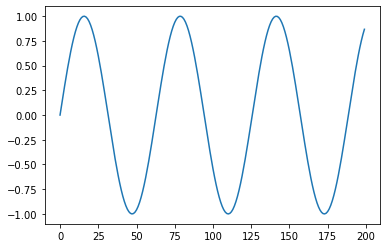

In [ ]:
plt.plot(series);

In [ ]:
T  = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
  #now we cast X and Y to numpy array
X = np.array(X)  

In [ ]:
X.shape

(190, 10)

In [ ]:
X = X.reshape(-1,T)

In [ ]:
Y = np.array(Y)

In [ ]:
Y.shape

(190,)

In [ ]:
N = len(X)

In [ ]:
N

190

Auto Regressive Model

In [ ]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(
    loss=  'mse',
    optimizer = Adam(lr = 0.1),
)
#train the rnn
r = model.fit(
    X[:-N//2],Y[:-N//2],#first half
    epochs = 80,
    validation_data = (X[-N//2:],Y[-N//2:]), #second half
)
#model.fit(training data,epocs,validation data)

Epoch 1/80
3/3 [==============================] - 0s 29ms/step - loss: 4.5428 - val_loss: 0.9121
Epoch 2/80
3/3 [==============================] - 0s 6ms/step - loss: 0.6492 - val_loss: 0.7153
Epoch 3/80
3/3 [==============================] - 0s 6ms/step - loss: 1.3028 - val_loss: 1.2662
Epoch 4/80
3/3 [==============================] - 0s 6ms/step - loss: 1.1780 - val_loss: 0.6155
Epoch 5/80
3/3 [==============================] - 0s 6ms/step - loss: 0.3554 - val_loss: 0.1766
Epoch 6/80
3/3 [==============================] - 0s 6ms/step - loss: 0.2476 - val_loss: 0.3182
Epoch 7/80
3/3 [==============================] - 0s 7ms/step - loss: 0.4581 - val_loss: 0.2711
Epoch 8/80
3/3 [==============================] - 0s 8ms/step - loss: 0.2782 - val_loss: 0.0694
Epoch 9/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0543 - val_loss: 0.0623
Epoch 10/80
3/3 [==============================] - 0s 6ms/step - loss: 0.0858 - val_loss: 0.1249
Epoch 11/80
3/3 [=====================

In [ ]:
r.history.keys()

dict_keys(['loss', 'val_loss'])

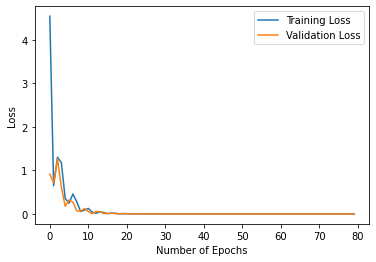

In [ ]:
plt.plot(r.history['loss'],label='Training Loss')
plt.plot(r.history['val_loss'],label = 'Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend();

**Forecasting**

In [ ]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2] #one d array of length T

while len(validation_predictions)<len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0] 
  validation_predictions.append(p)
  #make the new input
  last_x = np.roll(last_x,-1) #so here we are shfting the training data to 1 poisition left
  last_x[-1] = p #at the last positon we are placing the predicted value


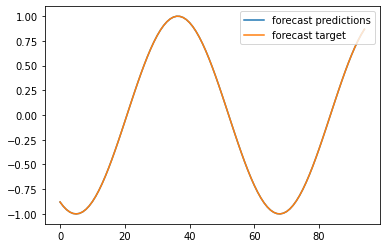

In [ ]:
plt.plot(validation_predictions, label = 'forecast predictions')
plt.plot(validation_target, label = 'forecast target')
plt.legend()
